#Boosting Techniques Assignment

**Question 1. What is Boosting in Machine Learning? Explain how it improves weak learners.**
- Boosting is an ensemble learning technique that combines multiple weak learners to create a strong predictive model.

- It works by training models sequentially, where each new model focuses more on the data points that were misclassified by previous models.

- Boosting improves weak learners by:
  - giving more importance (weights) to difficult samples
  - reducing bias
  - gradually improving overall accuracy

- Examples of boosting algorithms are AdaBoost, Gradient Boosting, XGBoost, and CatBoost.

**Question 2. What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?**
- AdaBoost trains models sequentially and changes the weights of misclassified samples, forcing the next model to focus more on those samples.

- Gradient Boosting also trains models sequentially, but instead of changing sample weights, it fits each new model to the residual errors (gradients) of the previous model.

- In short:
  - AdaBoost → reweights misclassified samples
  - Gradient Boosting → learns from residual errors

**Question 3. How does regularization help in XGBoost?**
- Regularization in XGBoost helps prevent overfitting by penalizing model complexity.

- It does this by:
  - controlling the depth of trees
  - penalizing large leaf weights
  - discouraging overly complex models

- This leads to:
  - better generalization
  - more stable predictions
  - reduced risk of fitting noise instead of patterns

**Question 4. Why is CatBoost considered efficient for handling categorical data?**
- CatBoost is efficient with categorical data because it:
  - handles categorical features without manual encoding
  - uses ordered target encoding to avoid data leakage
  - reduces overfitting on small or noisy datasets

- This makes CatBoost faster to train and more accurate when datasets contain many categorical variables.

**Question 5. What are some real-world applications where boosting techniques are preferred over bagging methods?**
- Boosting is preferred when:
  - the problem is complex and non-linear
  - bias needs to be reduced

- Real-world applications include:
  - credit risk and loan default prediction
  - fraud detection
  - customer churn prediction
  - search ranking systems
  - recommendation engines

- In these cases, boosting models perform better because they focus on hard-to-predict cases and learn complex patterns.


**Question 6: Write a Python program to:**
- Train an AdaBoost Classifier on the Breast Cancer dataset
- Print the model accuracy

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

# Train AdaBoost model
model = AdaBoostClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("AdaBoost Accuracy:", accuracy)

AdaBoost Accuracy: 0.9883040935672515


**Question 7: Write a Python program to:**
- Train a Gradient Boosting Regressor on the California Housing dataset
- Evaluate performance using R-squared score

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

# Train model
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, y_train)

# Predict and evaluate
y_pred = gbr.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("R-squared Score:", r2)

R-squared Score: 0.7826346388949185


**Question 8: Write a Python program to:**
- Train an XGBoost Classifier on the Breast Cancer dataset
- Tune the learning rate using GridSearchCV
- Print the best parameters and accuracy

In [4]:
# If running first time, install xgboost
# !pip install xgboost

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load data
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

# Model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Grid search
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1]
}

grid = GridSearchCV(xgb, param_grid, cv=5)
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:10:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:10:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:10:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:10:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:10:48] WARNING: /w

Best Parameters: {'learning_rate': 0.1}
Accuracy: 0.9649122807017544


**Question 9: Write a Python program to:**
- Train a CatBoost Classifier
- Plot the confusion matrix using seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.0 MB/s eta 0:00:00


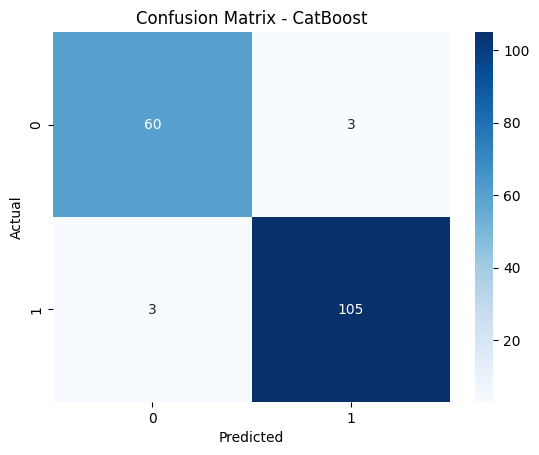

In [6]:
# If running first time, install catboost
!pip install catboost

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

# Train CatBoost
model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost")
plt.show()

**Question 10: You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior.**

**The dataset is imbalanced, contains missing values, and has both numeric and categorical features.**
- Describe your step-by-step data science pipeline using boosting techniques:
  - Data preprocessing & handling missing/categorical values
  - Choice between AdaBoost, XGBoost, or CatBoost
  - Hyperparameter tuning strategy
  - Evaluation metrics you'd choose and why
  - How the business would benefit from your model

In [7]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

# Simulated loan dataset
X, y = make_classification(
    n_samples=1000,
    n_features=12,
    n_informative=6,
    weights=[0.85, 0.15],
    random_state=0
)

# Model
model = XGBClassifier(eval_metric='logloss')

# Cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

print("Average ROC-AUC Score:", scores.mean())

Average ROC-AUC Score: 0.9276473197243202


**Step-by-Step Pipeline Explanation**

- Data Preprocessing
  - Handle missing values using mean/median for numeric features.
  - Use CatBoost or XGBoost for automatic categorical handling.
  - Scale numeric features if required.

- Choice of Boosting Algorithm
  - AdaBoost → simple datasets, low noise.
  - XGBoost → large, complex datasets with strong performance.
  - CatBoost → best when many categorical features exist.

- Hyperparameter Tuning
  - Use GridSearchCV or RandomizedSearchCV.
  - Tune learning rate, depth, number of estimators.

- Evaluation Metrics
  - Use ROC-AUC (best for imbalanced data).
  - Precision-Recall (important for default prediction).
  - F1-score to balance false positives and false negatives.

- Business Benefits
  - Better default risk detection.
  - Reduced financial losses.
  - More reliable loan approvals.
  - Improved trust and regulatory compliance.